In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [4]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [5]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [6]:
y = a*x + b

NameError: name 'a' is not defined

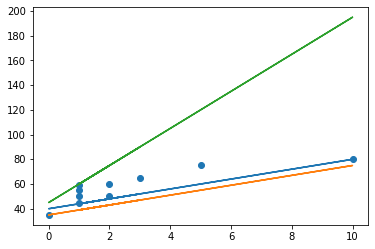

In [7]:
a = 4
b = 40
plt.scatter(X[1,:], y)
plt.plot(X[1,:], a*X[1,:] + b)
plt.plot(X[1,:], 4*X[1,:] + 35)
plt.plot(X[1,:], 15*X[1,:] + 45)

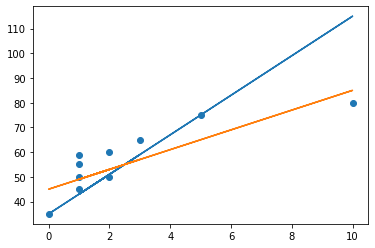

In [0]:
a = 8
b = 35
plt.scatter(X[1,:], y)
# y = a*x + b
plt.plot(X[1, :], a*X[1, :] + b)
plt.plot(X[1, :], 4*X[1, :] + 45)

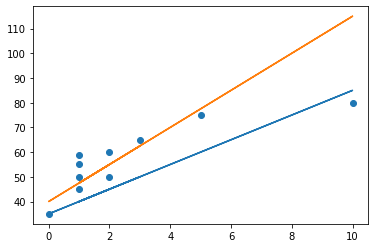

In [0]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5)
plt.plot(X[1], 40*X[0] + X[1]*7.5)

# mse - mean squared error
# mae - mean absolute error

In [8]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [9]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [10]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

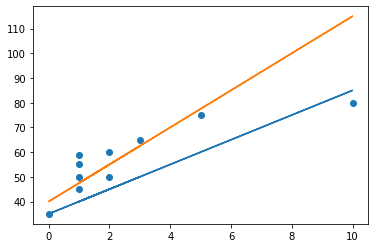

In [11]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1)
plt.plot(X[1], y_pred2)

In [12]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [13]:
err1, err2

(9.4, -2.1)

In [14]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [15]:
mae_1, mae_2

(10.4, 7.9)

In [16]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [17]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [18]:
X.shape

(2, 10)

In [19]:
X.T.shape

(10, 2)

In [20]:
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

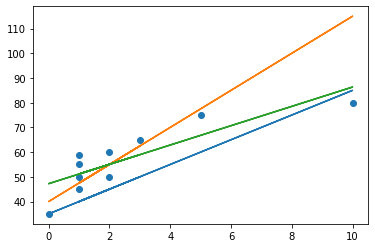

In [21]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [22]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [23]:
calc_mse(y, y_pred1)

143.6

In [24]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [25]:
calc_mae(y, y_pred1)

10.4

In [26]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [27]:
calc_mse(y, y_pred3)

45.93749999999999

In [28]:
calc_mae(y, y_pred3)

6.182142857142858

Градиентный спуск

In [0]:
np.mean(y_pred - y)**2
np.mean(w*x - y)**2
np.sum(w*x - y)**2 / n
1/n * np.sum((w*x - y)**2)
(w*x - y)**2

2*z*z`

2*x*(w*x - y) 
2*x*(w*x - y)

In [0]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [0]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [0]:
W[0] - g


7.384623655590011

1. Подберите скорость обучения (alpha) и количество итераций:

In [54]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.01)

In [55]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434


In [99]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.01)

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [101]:
for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#   for ii in range(W.shape[0]):
#     W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

0 [11.82211538 11.32211538] 737.091826923077


In [0]:
colab.research.google.com